## Árvores de decisão e florestas aleatórias em Python

# Árvore de decisão

Estrutura de Árvore:

Uma árvore de decisão é uma estrutura hierárquica composta por nós (nodes) e arestas (edges).
- Cada nó representa uma decisão baseada em uma característica específica dos dados.
- Os nós internos da árvore representam condições de decisão, enquanto as folhas representam os resultados das decisões.

Divisões Baseadas em Características:

- Em cada nó da árvore, uma característica é escolhida para dividir os dados em subgrupos mais homogêneos possível.
- A divisão é feita de forma que maximize a homogeneidade (ou minimize a impureza) dos subgrupos resultantes.

Critérios de Divisão:

- Os critérios de divisão, como o Gini impurity ou a entropia, são usados para medir a homogeneidade dos subgrupos.
- O algoritmo de aprendizado tenta escolher a divisão que reduz mais a impureza nos subgrupos.

Aprendizado Hierárquico:

- A árvore de decisão é construída de maneira recursiva, dividindo os dados em subgrupos cada vez mais homogêneos em cada nível da árvore.
- Esse processo continua até que as folhas representem grupos suficientemente homogêneos ou até que um critério de parada seja atingido.

Previsões:

- Para fazer previsões para novos dados, o modelo segue o caminho da raiz da árvore até uma folha, seguindo as condições de decisão em cada nó.
- A previsão é então feita com base na classe predominante nas amostras que alcançaram essa folha.

Interpretabilidade:

- Uma das vantagens das árvores de decisão é a sua interpretabilidade. Como as decisões são baseadas em condições claras das características, é fácil entender o processo de tomada de decisão do modelo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


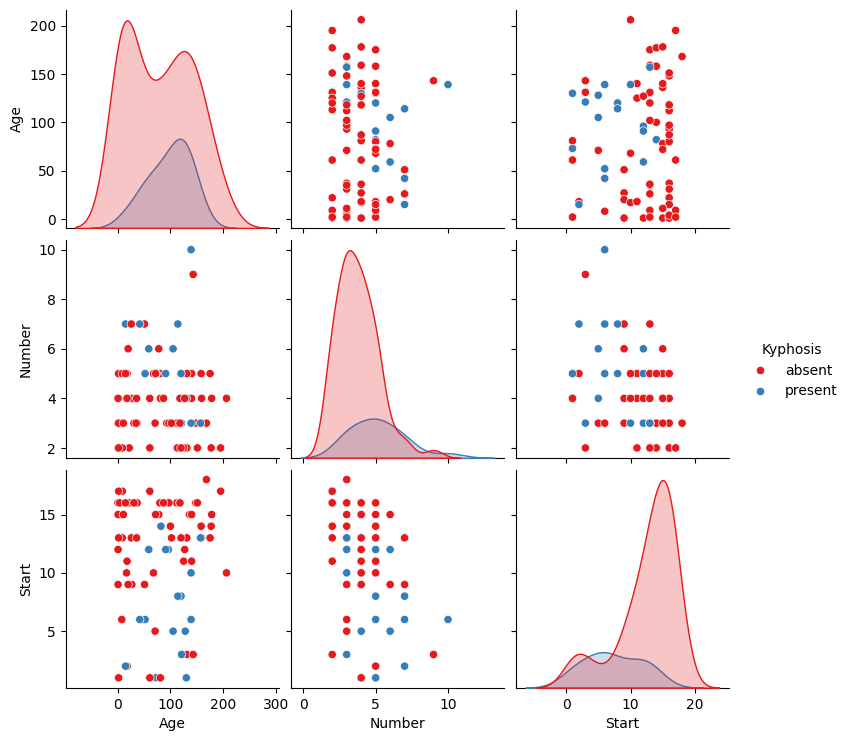

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

# Treino e teste 

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

# Árvore de decisão

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.91      0.78      0.84        27
     present       0.40      0.67      0.50         6

    accuracy                           0.76        33
   macro avg       0.66      0.72      0.67        33
weighted avg       0.82      0.76      0.78        33



In [16]:
print(confusion_matrix(y_test,predictions))

[[21  6]
 [ 2  4]]


A interpretação dos elementos desta matriz:

Verdadeiros Positivos (TP): 24

Falsos Positivos (FP): 3

Falsos Negativos (FN): 3

Verdadeiros Negativos (TN): 3

# Visualização da árvore

In [17]:
from IPython.display import Image  
import six
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

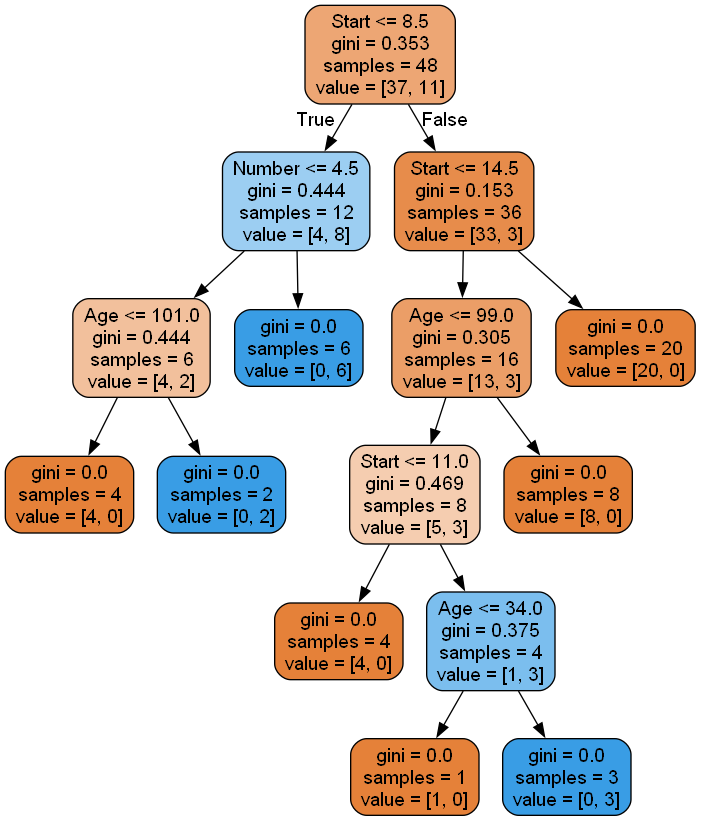

In [18]:
# Para rodar está parte do codigo talvez seja necessario instalar o graphviz e adicionar ele ao path https://graphviz.org/download/
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Na sua árvore de decisão, além das colunas que representam as características dos dados, possui também os termos "Gini", "Samples" e "Value". Abaixo terá significado de cada um deles:

Gini (Impureza de Gini):

O Gini é uma medida de impureza de um nó na árvore de decisão. Em cada nó da árvore, o algoritmo de aprendizado tenta dividir os dados de uma forma que minimize a impureza, ou seja, que torne as classes mais homogêneas possíveis em cada ramo da árvore.
Gini é calculado pela soma dos quadrados das proporções de cada classe no nó. Quanto mais próximo de zero, mais puro (homogêneo) é o nó, o que significa que a divisão é mais eficaz.

Samples (Amostras):

Indica o número de amostras que estão chegando a esse nó durante o treinamento da árvore. Cada nó da árvore representa um subconjunto dos dados de treinamento.
Por exemplo, se um nó tem 100 amostras, isso significa que durante o processo de treinamento, 100 exemplos foram classificados nesse nó e estão sendo considerados para a próxima divisão.

Value (Valor):

Indica a distribuição das classes nas amostras que alcançam esse nó. Por exemplo, se um nó tem o valor [20, 30], isso significa que há 20 amostras da classe 1 e 30 amostras da classe 2 que chegaram a esse nó.
Essa informação é útil para entender como os dados estão distribuídos em cada nó da árvore e como as decisões de divisão estão sendo tomadas.

## Floresta Aleatória

Combinação de Árvores de Decisão:

- Uma Floresta Aleatória é composta por um conjunto de árvores de decisão individuais.
- Cada árvore de decisão é treinada em uma subamostra aleatória do conjunto de dados de treinamento.

Amostragem com Reposição (Bagging):

- Para construir cada árvore de decisão, uma técnica chamada amostragem com reposição é usada.
- Isso significa que para cada árvore, uma amostra do conjunto de dados é selecionada aleatoriamente, permitindo que as mesmas amostras sejam escolhidas mais de uma vez.

Amostragem de Características:

- Além da amostragem de dados, as Florestas Aleatórias também usam amostragem de características.
- Isso significa que em cada divisão de uma árvore de decisão, apenas um subconjunto aleatório das características é considerado para dividir o nó.
- Essa aleatoriedade ajuda a reduzir a correlação entre as árvores individuais e torna a floresta mais robusta.

Votação por Maioria:

- Para fazer previsões, as Florestas Aleatórias combinam as previsões de todas as árvores individuais.
- Em problemas de classificação, a previsão final é determinada por voto majoritário, ou seja, a classe mais frequente prevista por todas as árvores.
- Em problemas de regressão, a previsão final é a média das previsões de todas as árvores.

Regularização Implícita:

- Devido à amostragem aleatória de dados e características, as Florestas Aleatórias têm uma tendência natural para lidar com overfitting.
- Cada árvore é treinada em uma amostra diferente dos dados, o que ajuda a reduzir a correlação entre as árvores e a generalizar melhor para novos dados.

Versatilidade e Desempenho:

- As Florestas Aleatórias são altamente versáteis e podem ser aplicadas a uma variedade de problemas de aprendizado de máquina, incluindo classificação, regressão e até mesmo detecção de anomalias.
- Elas geralmente produzem resultados robustos e têm um bom desempenho em muitos conjuntos de dados diferentes.


In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
rfc_predictions = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test, rfc_predictions))

[[25  2]
 [ 4  2]]


In [22]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

      absent       0.86      0.93      0.89        27
     present       0.50      0.33      0.40         6

    accuracy                           0.82        33
   macro avg       0.68      0.63      0.65        33
weighted avg       0.80      0.82      0.80        33

